# 1. **Input data**

My data is taken from Kaggle (https://www.kaggle.com/datasets/eugeniyosetrov/airline-delays). And you know, this website can only download the data but cannot link to it in Google Colab so I downloaded it and uploaded it to my Github (https://github.com/mickytini/Airline-Delays) so I can link to it as input as below:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mickytini/Airline-Delays/refs/heads/main/airline_delay.csv')

## **Data overview**

In [2]:
print(df.head())

   year  month carrier       carrier_name airport  \
0  2020     12      9E  Endeavor Air Inc.     ABE   
1  2020     12      9E  Endeavor Air Inc.     ABY   
2  2020     12      9E  Endeavor Air Inc.     AEX   
3  2020     12      9E  Endeavor Air Inc.     AGS   
4  2020     12      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         44.0        3.0   
1             Albany, GA: Southwest Georgia Regional         90.0        1.0   
2           Alexandria, LA: Alexandria International         88.0        8.0   
3        Augusta, GA: Augusta Regional at Bush Field        184.0        9.0   
4                   Albany, NY: Albany International         76.0       11.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        1.63         0.0  ...          0.0              1.25            0.0   
1        0.96         0.0  ...          

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [4]:
print(df.describe())

              year   month   arr_flights    arr_del15   carrier_ct  \
count  3351.000000  3351.0   3343.000000  3343.000000  3343.000000   
mean   2019.459266    12.0    298.271014    50.995214    16.065337   
std       0.498412     0.0    852.436335   146.484456    41.759516   
min    2019.000000    12.0      1.000000     0.000000     0.000000   
25%    2019.000000    12.0     35.000000     5.000000     1.490000   
50%    2019.000000    12.0     83.000000    12.000000     4.750000   
75%    2020.000000    12.0    194.500000    33.000000    12.255000   
max    2020.000000    12.0  19713.000000  2289.000000   697.000000   

        weather_ct       nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count  3343.000000  3343.000000  3343.000000       3343.000000    3343.000000   
mean      1.443144    16.183383     0.137320         17.166069       2.884535   
std       4.821657    56.423008     0.646479         55.447043      10.126658   
min       0.000000     0.000000     0.000000 

## **Check for Missing Values**

In [5]:
print(df.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64


# 2. **Data Cleaning**

## **Handle Missing Values**

In [6]:
# Fill missing values with 0
df.fillna(0, inplace=True)

In [7]:
# Check data again
print(df.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


## **Check for Outliers**:

The type of data that our data has is statistical data that reflects the situation that has occurred.
The data in columns: `arr_flights`, `arr_del15`, `carrier_ct`, `weather_ct`, `nas_ct`,`security_ct`, `late_aircraft_ct`, `arr_cancelled`, `arr_diverted` are statistics of the number of flights that had problems corresponding to the `airport`,`carrier` columns,...

Therefore, I think there is no need to check outliers in this case.

## **Standardize Formats:** Ensure consistent formats for categorical columns

In [8]:
df['carrier'] = df['carrier'].str.upper()
df['airport'] = df['airport'].str.upper()

# 3. **Exploratory Data Analysis (EDA)**

## **Total flights per year**

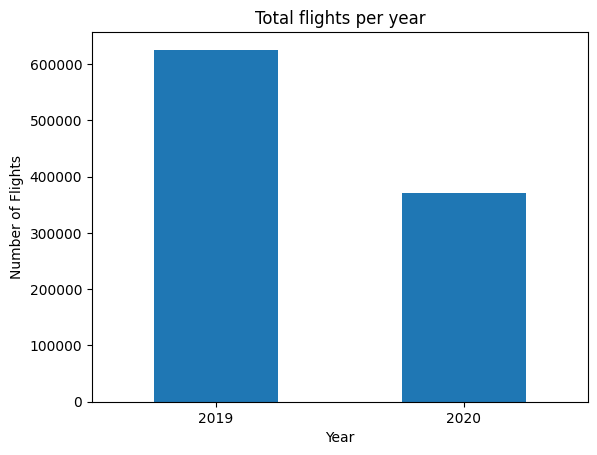

In [9]:
total_flights = df.groupby(['year'])['arr_flights'].sum().plot(kind='bar')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of Flights')
plt.title('Total flights per year')
plt.show()

## **Total delay time per year**

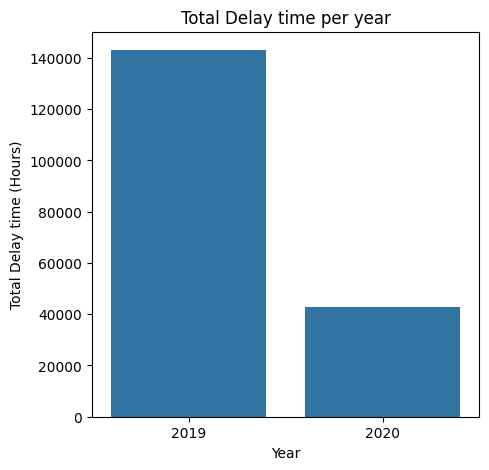

In [10]:
# Calculate total delay time in hours for each year
total_delaytime_2019 = df[df['year'] == 2019]['arr_delay'].sum() / 60
total_delaytime_2020 = df[df['year'] == 2020]['arr_delay'].sum() / 60

# Visualize using a bar chart
data_delay = {'Year': [2019, 2020], 'Total Delay (Hours)': [total_delaytime_2019, total_delaytime_2020]}
df_delay = pd.DataFrame(data_delay)

plt.figure(figsize=(5, 5))
sns.barplot(x='Year', y='Total Delay (Hours)', data=df_delay)
plt.title('Total Delay time per year')
plt.xlabel('Year')
plt.ylabel('Total Delay time (Hours)')

plt.show()

## **Most delayed flights by airline**

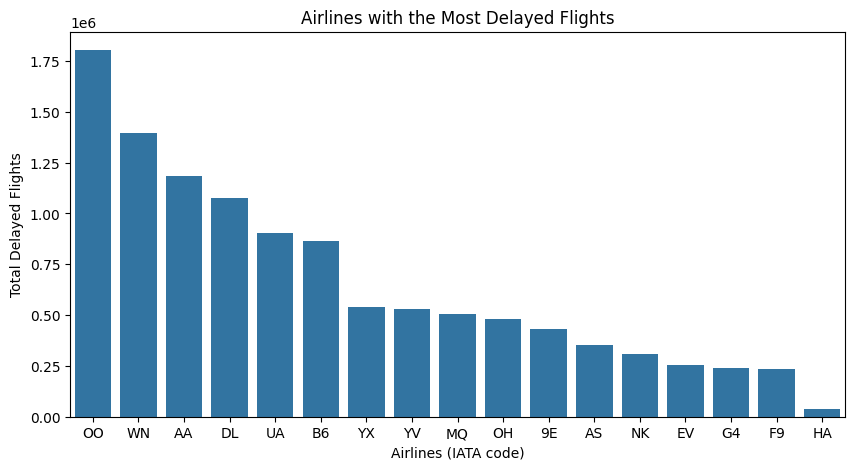

In [11]:
# Group by airline and calculate the total number of delayed flights
airline_delay_counts = df.groupby('carrier')['arr_delay'].sum().sort_values(ascending=False)

# Visualize using a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=airline_delay_counts.index, y=airline_delay_counts.values)
plt.title("Airlines with the Most Delayed Flights")
plt.xlabel("Airlines (IATA code)")
plt.ylabel("Total Delayed Flights")
plt.show()

## **Reasons for flight delayed by Airline**

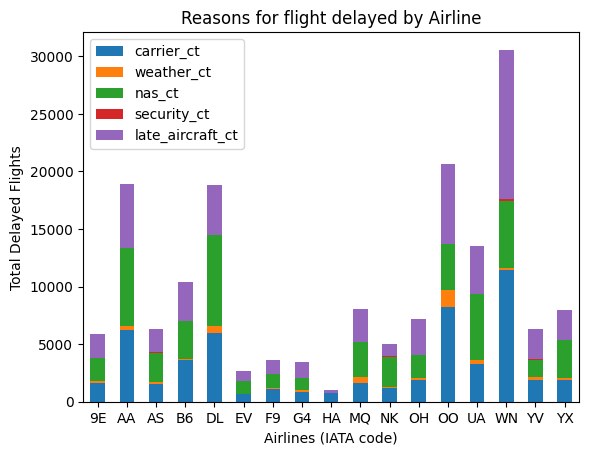

In [12]:
cols = ['carrier', 'carrier_name', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
dfcols = df[cols]

airlinecode = dfcols.groupby(['carrier', 'carrier_name']).sum().reset_index()
airlinecode.plot(x='carrier', kind='bar', stacked=True)
plt.xlabel('Airlines (IATA code)')
plt.ylabel('Total Delayed Flights')
plt.title('Reasons for flight delayed by Airline')
plt.xticks(rotation=0)
plt.show()


# 4. **Analysis**

## **Top 10 Airlines with Highest Delay Rates**

In [13]:
# Airlines with significant delay rates
airline_data = df.query('arr_flights > 0') #fillna
airline_data['airline_delay_rate'] = (airline_data['arr_del15'] / airline_data['arr_flights']) * 100

top_airlines = airline_data.groupby('carrier')['airline_delay_rate'].mean().nlargest(10)

print(top_airlines)

carrier
B6    25.393469
EV    23.702901
YV    21.166910
HA    17.690051
OH    17.324604
AS    17.270222
G4    17.256466
UA    16.649691
WN    16.494024
OO    16.432823
Name: airline_delay_rate, dtype: float64


<ipython-input-13-1c2415c35439>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['airline_delay_rate'] = (airline_data['arr_del15'] / airline_data['arr_flights']) * 100


## **Top 10 Airports with Highest Delay Rates**

In [14]:
# Airports with significant delay rates
airport_data = df.query('arr_flights > 0')
airport_data['airport_delay_rate'] = (airport_data['arr_del15'] / airport_data['arr_flights']) * 100

top_airports = airport_data.groupby('airport_name')['airport_delay_rate'].mean().nlargest(10)

print(top_airports)

airport_name
Adak Island, AK: Adak                         50.694444
Cold Bay, AK: Cold Bay Airport                50.000000
Ponce, PR: Mercedita                          37.931034
Aguadilla, PR: Rafael Hernandez               37.787764
Nantucket, MA: Nantucket Memorial             33.333333
Cody, WY: Yellowstone Regional                32.000000
Concord, NC: Concord Padgett Regional         30.806776
Worcester, MA: Worcester Regional             30.414747
Aspen, CO: Aspen Pitkin County Sardy Field    28.109113
Quincy, IL: Quincy Regional-Baldwin Field     27.777778
Name: airport_delay_rate, dtype: float64


<ipython-input-14-7a2c2065eb34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_data['airport_delay_rate'] = (airport_data['arr_del15'] / airport_data['arr_flights']) * 100


## **Correlation Analysis for Delay Factors**

In [15]:
# Correlation Matrix
correlation_matrix = df[['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].corr()
correlation_matrix

,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
arr_flights,1.000000,0.913967,0.728359,0.821731,0.525766,0.859216
carrier_ct,0.913967,1.000000,0.687357,0.741908,0.550580,0.871011
weather_ct,0.728359,0.687357,1.000000,0.598231,0.329519,0.625575
nas_ct,0.821731,0.741908,0.598231,1.000000,0.423153,0.777875
security_ct,0.525766,0.550580,0.329519,0.423153,1.000000,0.513085
late_aircraft_ct,0.859216,0.871011,0.625575,0.777875,0.513085,1.000000


### **Key Insights**

- `carrier_ct` and `arr_flights`

  Correlation: $0.91$
  
  Interpretation: There is a very strong correlation between `carrier_ct` and `arr_flights`
  
  This suggests that a significant number of flight delays at airports are due to airline-related issues, such as poor crew management, inadequate scheduling, or operational inefficiencies.

- `late_aircraft_ct` and `arr_flights`
  
  Correlation: $0.86$
  
  Interpretation: There is a very strong correlation between `late_aircraft_ct` and `arr_flights`

  This indicates that delays caused by late aircraft rotations (where an arrival flight's delay affects its subsequent departure) significantly contribute to the overall flight delays.

- `nas_ct` and `arr_flights`

  Correlation: $0.82$
  
  Interpretation: There is a very strong correlation between `nas_ct` and `arr_flights`

  This implies that delays due to National Aviation System (NAS) issues, such as heavy air traffic, airport congestion, or infrastructure limitations, are major contributors to flight delays.

- We also see 2 other correlations and they are strong correlations: `weather_ct` and `arr_flights` ($0.73$) ; `security_ct` and `arr_flights` ($0.53$), but because they are objective reasons that cannot be intervened or controlled, we will not focus on them.

## **Multiple Linear Regression:** Predict delay > 15 minutes `arr_del15` using delay types: `carrier_ct`, `late_aircraft_ct` and `nas_ct`

In [17]:
X = df[['carrier_ct', 'nas_ct', 'late_aircraft_ct']].fillna(0)
y = df['arr_del15'].fillna(0)

# Add a constant
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              arr_del15   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.023e+06
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:13:14   Log-Likelihood:                -8889.8
No. Observations:                3351   AIC:                         1.779e+04
Df Residuals:                    3347   BIC:                         1.781e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1698      0.064  

### **Interpreting multiple linear regression results**

**Overall model fit**

  - R-squared:  $1.000$

  This means that  $100\%$  of the variance in the dependent variable (`arr_del15`) is explained by the independent variables (`carrier_ct`, `nas_ct`, and `late_aircraft_ct`). In other words, $100\%$ of flights delayed by independent variables cause flight delays of 15 minutes or more.
  
  This indicates **`a perfect fit`** of the model to the data.

  - Adj. R-squared:  $1.000$
  
  The adjusted R-squared is equal to R-squared. This further proves that: this indicates **`a perfect fit`** of the model to the data.

**Individual coefficients, p-value**
1. const
  - coef:  $0.1698$ : When all independent variables are 0 (no delays caused by `carrier_ct`, `nas_ct`, or `late_aircraft_ct`), the model predicts an average of $0.1698$ flights delayed by more than 15 minutes (`arr_del15`). This small positive value indicates that even when all specific delay categories are absent, there may still be a small baseline number of delayed flights due to other unmeasured factors.
  - p-value:  $0.008$ : This is lower than  $0.05$ , indicating that the intercept is statistically significant. The independent variable likely has a real effect on the dependent variable.

2. carrier_ct:

  - coef:  $1.0688$ : For every additional flight delayed due to `carrier_ct`, there is an average increase of approximately $1.0688$ flights in the `arr_del15` count. This indicates a strong positive relationship, meaning carrier-related delays significantly contribute to the total number of delayed flights.
  - p-value:  $0.000$ : The p-value is extremely small (essentially $0$), meaning the contribution of `carrier_ct` delays to the total number of delayed flights is highly statistically significant.

3. nas_ct:

  - coef:  $1.0165$ : For every additional flight delayed due to `nas_ct`, the `arr_del15` count increases by $1.0165$ flights on average. This coefficient is close to $1$, indicating that `nas_ct` delays almost directly map to an equivalent increase in the count of delayed flights.
  - p-value:  $0.000$ : Similar to `carrier_ct`, the p-value is essentially 0, confirming that delays due to the National Aviation System have a statistically significant effect on the dependent variable.

4. late_aircraft_ct:

  - coef:  $1.0021$ : For every additional flight delayed due to `late_aircraft_ct`, the `arr_del15` count increases by $1.0021$ flight on average. This near-perfect 1:1 relationship implies that `late_aircraft_ct` delays are essentially passed directly into the total count of delayed flights.
  - p-value:  $0.000$ : Again, the p-value is effectively 0, showing that delays caused by `late_aircraft_ct` are highly statistically significant.

### **Summary**

- The model explains $99.9\%$ of the variance in the number of flights delayed by more than 15 minutes (`arr_del15`), indicating an excellent fit.
- All three predictors—`carrier_ct` (delays caused by carriers), `nas_ct` (delays due to the National Aviation System), and `late_aircraft_ct` (delays from previous flights)—are statistically significant contributors to the model (p-values < $0.001$).
- The intercept (`const`) is also statistically significant, suggesting a small baseline level of delays not explained by the included predictors.

## **Evaluating the Model**

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predictions = model.predict(X_test)

# Evaluate the model
mse = np.mean((y_test - predictions) ** 2)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 4.734019614595766
RMSE: 2.1757802312264367


In [ ]:
df['arr_del15'].describe()

,arr_del15
count,3351.000000
mean,50.873471
std,146.330616
min,0.000000
25%,5.000000
50%,12.000000
75%,33.000000
max,2289.000000


**Comparison to the Mean:**

  - The mean of the `arr_del15` column is $50.873$.

  - The RMSE of $2.176$ is approximately $4.28\%$ of the mean.

  - This indicates that the model's average prediction error is very small compared to the average value in the dataset.

**Comparison to the Standard Deviation:**

  - The standard deviation of `arr_del15` is $146.331$.

  - The RMSE of $2.176$ is approximately $1.49\%$ of the standard deviation.

  - This suggests that the RMSE is much smaller than the typical variation in the data, reflecting excellent predictive accuracy.

**Range of the Data:**

  - The range of the data is from $0$ to $2289$.

  - The RMSE of $2.176$ represents about $0.095\%$ of the range.

  - This shows that the error is extremely small relative to the total spread of the values.

## **Summary**

- **Relative to the Mean**: The RMSE is about $4.28\%$ of the mean, indicating a highly accurate model with a small average error compared to the average value of the data.

- **Relative to the Standard Deviation**: The RMSE is about $1.49\%$ of the standard deviation, suggesting that the error is significantly smaller than the typical variability in the data.

- **Relative to the Range**: The RMSE represents $0.095\%$ of the range, demonstrating that the prediction error is negligible relative to the entire spread of the dataset.

The low RMSE and MSE values, combined with their small percentages relative to the mean, standard deviation, and range, demonstrate that the model's predictions are highly accurate and reliable for this dataset.

## **Logistic Regression:** Classify whether an airline has a high delay rate (above $15\%$) using delay types: `carrier_ct`, `late_aircraft_ct` and `nas_ct`


In [19]:
# Create a binary column for high delay risk
df['high_delay'] = (df['arr_del15'] / df['arr_flights'] > 0.15).astype(int)

# Features and target
X = df[['carrier_ct', 'nas_ct', 'late_aircraft_ct']].fillna(0)
y = df['high_delay']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.655469
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             high_delay   No. Observations:                 3351
Model:                          Logit   Df Residuals:                     3347
Method:                           MLE   Df Model:                            3
Date:                Wed, 01 Jan 2025   Pseudo R-squ.:                 0.05304
Time:                        11:06:38   Log-Likelihood:                -2196.5
converged:                       True   LL-Null:                       -2319.5
Covariance Type:            nonrobust   LLR p-value:                 4.631e-53
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1220      0.041     -2.953      0.003      -0.203      -0.041
carrier_ct 

## **Interpretation of logistic regression**

**Pseudo R-squared**: $0.05304$

- It indicates that the model explains approximately 5.3% of the variance in the dependent variable (`high_delay`).

- While this is a low value, it is not uncommon in logistic regression, especially when predicting outcomes for complex phenomena.

**LLR p-value**: $4.631e-53$

  - It is extremely small. This indicates that the overall model is highly statistically significant. The predictors, when considered together, significantly contribute to the prediction of the outcome variable (`high_delay`).

**Predictors Interpretation**

- `const`:
  
  Coefficient: $-0.1220$
  
  p-value: $0.003$ < $0.05$, so the intercept is statistically significant.
  
  Interpretation: The baseline log-odds of a flight having a high delay when all predictors are zero is $-0.1220$. This corresponds to an odds ratio of
  $𝑒$ ^−0.122 ≈ $0.885$, meaning a slightly lower chance of high delay in the baseline scenario.

- `carrier_ct`:

  Coefficient: $-0.0154$

  p-value: $0.000$ < $0.001$, statistically significant.
  
  Interpretation: For every one additional flight delayed due to the carrier, the log-odds of a flight experiencing a high delay decrease by $0.0154$.
  
  Odds ratio: $e$ ^−0.0154 ≈ $0.985$, meaning the odds decrease by about 1.5% per additional carrier delay.

- `nas_ct`:
  
  Coefficient: $-0.0073$
  
  p-value: $0.000$ < $0.001$, statistically significant.
  
  Interpretation: For every one additional flight delayed due to NAS issues, the log-odds of a high delay decrease by $0.0073$.
  
  Odds ratio: $e$ ^−0.0073 ≈ $0.993$, meaning the odds decrease by about 0.7% per additional NAS delay.

- `late_aircraft_ct`:

  Coefficient: $0.0442$
  
  p-value: $0.000$ < $0.001$, statistically significant.
  
  Interpretation: For every one additional flight delayed due to a late aircraft, the log-odds of a high delay increase by $0.0442$.
  
  Odds ratio: $e$ ^0.0442 ≈ $1.045$, meaning the odds increase by about 4.5% per additional late aircraft delay.

## **Summary:**

1. **Model Fit**:

  The Pseudo R-squared value of $0.05304$ suggests the model explains a modest portion of the variance in `high_delay`, which is acceptable for logistic regression in complex systems.
  
  The extremely low LLR p-value confirms the model's overall statistical significance.

2. **Predictor Insights**:

  `carrier_ct` delays and `nas_ct` delays both reduce the odds of `high_delay`, albeit to a small degree, and are statistically significant.
  
  `late_aircraft_ct` delays increase the odds of `high_delay` and appear to have the largest impact among the predictors.
  
  The intercept is significant but plays a less interpretable role in real-world context.

3. **Conclusion**:

  The model demonstrates meaningful relationships between the predictors and `high_delay`, particularly highlighting the role of late aircraft delays as a strong contributor to high delays. These insights could guide strategies to improve flight timeliness.

## **Prediction with logistic regression**

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit logistic regression model
model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.649592
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             high_delay   No. Observations:                 2680
Model:                          Logit   Df Residuals:                     2676
Method:                           MLE   Df Model:                            3
Date:                Wed, 01 Jan 2025   Pseudo R-squ.:                 0.06143
Time:                        11:37:55   Log-Likelihood:                -1740.9
converged:                       True   LL-Null:                       -1854.9
Covariance Type:            nonrobust   LLR p-value:                 3.933e-49
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1197      0.047     -2.566      0.010      -0.211      -0.028
carrier_ct 

In [21]:
# Predicting the probabilities
predictions = model.predict(X_test)

threshold = 0.5
predicted_classes = np.where(predictions > threshold, 1, 0)
predicted_classes

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

In [22]:
val_correct = np.sum(predicted_classes == y_test)
val_all = np.size(predicted_classes)

accuracy = val_correct / val_all
print(f'Logistic Regression Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.6855439642324889


Our model predicted  **$68.6\%$**  of data correctly.

# 5. **Visualization**

## **Correlation heatmap**

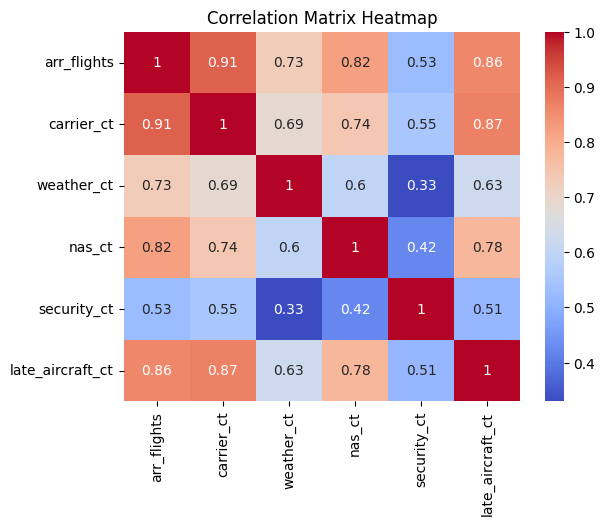

In [ ]:
# Correlation Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## **Visualize Delay Rates by Airline**

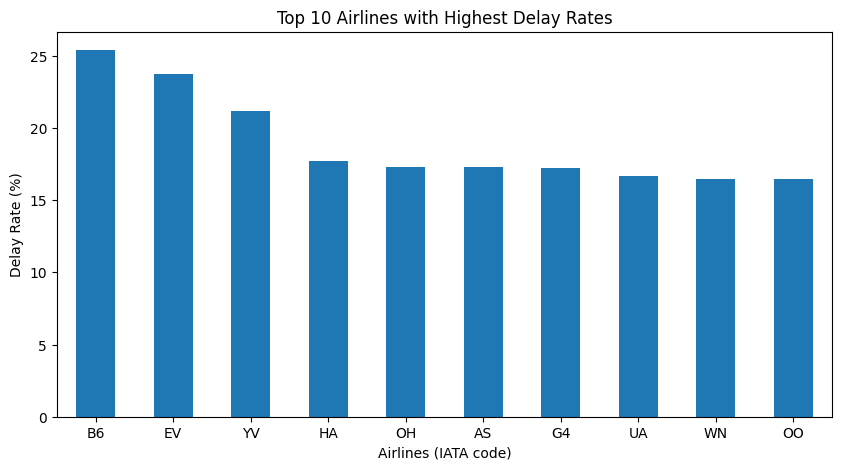

In [ ]:
# Plot
top_airlines.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Airlines with Highest Delay Rates')
plt.xlabel('Airlines (IATA code)')
plt.ylabel('Delay Rate (%)')
plt.xticks(rotation=0)
plt.show()

## **Visualize Delay Rates by Airport**

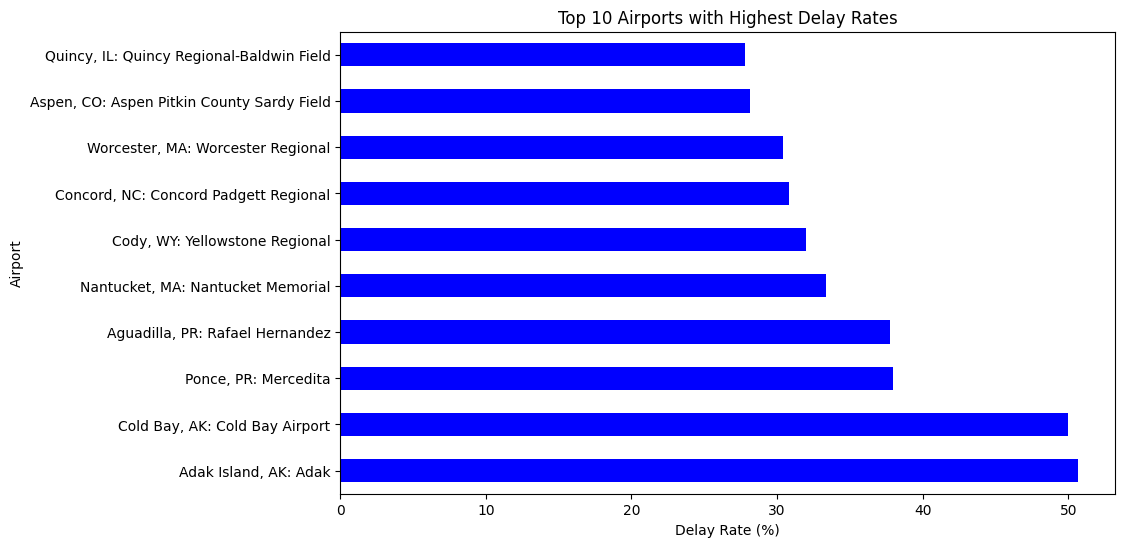

In [ ]:
# Plot
top_airports.plot(kind='barh', figsize=(10, 6), color='blue')
plt.title('Top 10 Airports with Highest Delay Rates')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Airport')
plt.show()

# **Extract to CSV for Power BI**

In [ ]:
# Save key DataFrames to CSV
df.to_csv('cleaned_airline_delay_data.csv', index=False)